# First we need to import necessary libraries.

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
%matplotlib inline 

Now we are reading "weather" dataset and then showing. 

In [14]:
data = pd.read_csv("weather.txt", delimiter=',')
data

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,False,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


Here, I splited dataset to 2 types descriptive features and target features. In order to split only one column I used drop() function.   

In [19]:
X = data.drop("play", 1)
y = data['play']

Now we are doing classification all of the values are must be integer. But, in our data set have categorical values. Therefore, we need to convert categorical value to numerical value. In order to achieve the purpose we will use LabelEncoder of sklearn library. 

In [21]:
convert = preprocessing.LabelEncoder()
X['outlook'] = convert.fit_transform(X['outlook'])
X['windy'] = convert.fit_transform(X['windy'])
y = convert.fit_transform(y)
X

,outlook,temperature,humidity,windy
0,2,85,85,0
1,2,80,90,1
2,0,83,86,0
3,1,70,96,0
4,1,68,80,0
5,1,65,70,0
6,0,64,65,1
7,2,72,95,0
8,2,69,70,0
9,1,75,80,0


We can split our dataset to training and testing using train_test_split() function. Eventough we use the function in big datasets, in our case, I used that function. If you want you don't need to use. The test_size parameter is so important which is decide size of test data set. In our case test data 30% and training data 70%.      

In [26]:
gNB = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 9 samples in the training dataset
There are 5 samples in the testing dataset
Each sample has 4 features


Now we create our Naive bayes classifier. Fitting our training data to NB classifier means we create our model, then we predicted our test data. Result will give us accuraccy.    

In [27]:
NB = GaussianNB().fit(X_train, y_train)

predicted_y = NB.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predicted_y)
average_accuracy = np.mean(y_test == predicted_y) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

print( metrics.classification_report(y_test,predicted_y))
metrics.confusion_matrix(y_test, predicted_y)

The average_accuracy is 80.0%
             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.75      0.86         4

avg / total       0.90      0.80      0.82         5



array([[1, 0],
       [1, 3]])

# Visulasition

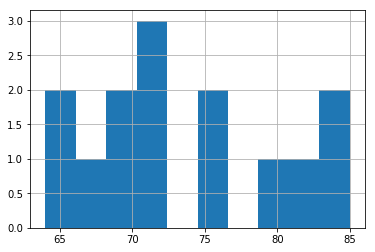

In [31]:
X["temperature"].hist(bins=10);

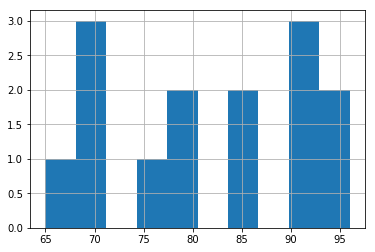

In [32]:
X["humidity"].hist() 

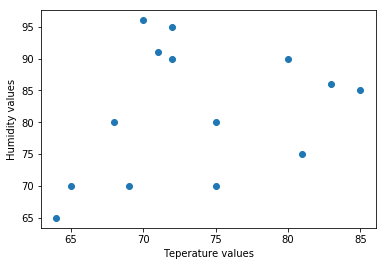

In [38]:
plt.scatter(x=X["temperature"], y = X["humidity"])
plt.xlabel("Teperature values")
plt.ylabel("Humidity values")

Lets start linear regression. We droped two binary feautres. Then we did max min normolize.

In [53]:
X_reg = X.drop(["outlook", "windy"],1)